In [1]:
#first get the hugo ids from selected file
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from heatmapcluster import heatmapcluster

inpdat = "../../3ormoreDATLOW.csv"
with open(inpdat,'r') as f:
    it = csv.reader(f)
    namebank = list(it)

names = []
for n in namebank[0]:
    if(n != "" and n != "class"):
        names.append(n.split("_")[0])

names

['BRAF',
 'GRB14',
 'MBD4',
 'MSH6',
 'PRDM2',
 'HMMR',
 'SEC63',
 'KRAS',
 'PIK3CA',
 'RAD50',
 'ACVR2A',
 'CASP5',
 'MSH3',
 'ATR',
 'TGFBR2',
 'AIM2',
 'TCF7L2']

In [2]:
#now open up hugo dat
filepath = '../../coadreadDAThugocombine.csv'
dataMatrix = pd.read_csv(filepath, index_col=0)
dataMatrix.loc[dataMatrix['class'] == 2.0, 'class'] = -1.0


colorstore = {}
for index, row in dataMatrix.iterrows():
    if(row['class'] == 1.0):
        colorstore[index] = "green"
    else:
        colorstore[index] = "red"
colorstore

{'TCGA-A6-2670': 'red',
 'TCGA-A6-2672': 'green',
 'TCGA-A6-2674': 'red',
 'TCGA-A6-2676': 'green',
 'TCGA-A6-2677': 'red',
 'TCGA-A6-2678': 'red',
 'TCGA-A6-2683': 'red',
 'TCGA-A6-3807': 'red',
 'TCGA-A6-3808': 'red',
 'TCGA-A6-3810': 'red',
 'TCGA-AA-3514': 'red',
 'TCGA-AA-3516': 'green',
 'TCGA-AA-3517': 'red',
 'TCGA-AA-3518': 'green',
 'TCGA-AA-3519': 'red',
 'TCGA-AA-3520': 'red',
 'TCGA-AA-3521': 'red',
 'TCGA-AA-3522': 'red',
 'TCGA-AA-3524': 'red',
 'TCGA-AA-3525': 'green',
 'TCGA-AA-3526': 'red',
 'TCGA-AA-3527': 'red',
 'TCGA-AA-3529': 'red',
 'TCGA-AA-3530': 'red',
 'TCGA-AA-3531': 'red',
 'TCGA-AA-3532': 'red',
 'TCGA-AA-3534': 'red',
 'TCGA-AA-3538': 'red',
 'TCGA-AA-3542': 'red',
 'TCGA-AA-3543': 'green',
 'TCGA-AA-3544': 'red',
 'TCGA-AA-3548': 'red',
 'TCGA-AA-3549': 'red',
 'TCGA-AA-3552': 'red',
 'TCGA-AA-3553': 'red',
 'TCGA-AA-3554': 'red',
 'TCGA-AA-3555': 'red',
 'TCGA-AA-3556': 'red',
 'TCGA-AA-3558': 'red',
 'TCGA-AA-3560': 'red',
 'TCGA-AA-3561': 'red',
 'TC

In [3]:
#make it so we only see CIMP-High
#NOTE: comment out to get both classes
#dataMatrix = dataMatrix[dataMatrix['class'] == 1.0]

dataMatrix = dataMatrix.drop('class',1)


dataMatrix = dataMatrix.transpose()
print("shape: ",dataMatrix.shape[0],dataMatrix.shape[1])
#dataMatrix = dataMatrix.loc[:, (dataMatrix != 0).any(axis=0)]

dataMatrix.head()

shape:  15947 224


,TCGA-A6-2670,TCGA-A6-2672,TCGA-A6-2674,TCGA-A6-2676,TCGA-A6-2677,TCGA-A6-2678,TCGA-A6-2683,TCGA-A6-3807,TCGA-A6-3808,TCGA-A6-3810,...,TCGA-AG-A020,TCGA-AG-A025,TCGA-AG-A026,TCGA-AG-A02G,TCGA-AG-A02N,TCGA-AG-A02X,TCGA-AG-A032,TCGA-AG-A036,TCGA-AY-4070,TCGA-AY-4071
TP53,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
ASCC1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
POLR3B,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARHGEF7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
FREM2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
#subsection the dataframe so it only includes rows named previously
dataMatrix = dataMatrix[dataMatrix.index.isin(names)]
dataMatrix

,TCGA-A6-2670,TCGA-A6-2672,TCGA-A6-2674,TCGA-A6-2676,TCGA-A6-2677,TCGA-A6-2678,TCGA-A6-2683,TCGA-A6-3807,TCGA-A6-3808,TCGA-A6-3810,...,TCGA-AG-A020,TCGA-AG-A025,TCGA-AG-A026,TCGA-AG-A02G,TCGA-AG-A02N,TCGA-AG-A02X,TCGA-AG-A032,TCGA-AG-A036,TCGA-AY-4070,TCGA-AY-4071
BRAF,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PRDM2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACVR2A,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ATR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
HMMR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
GRB14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBD4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
MSH6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SEC63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
KRAS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


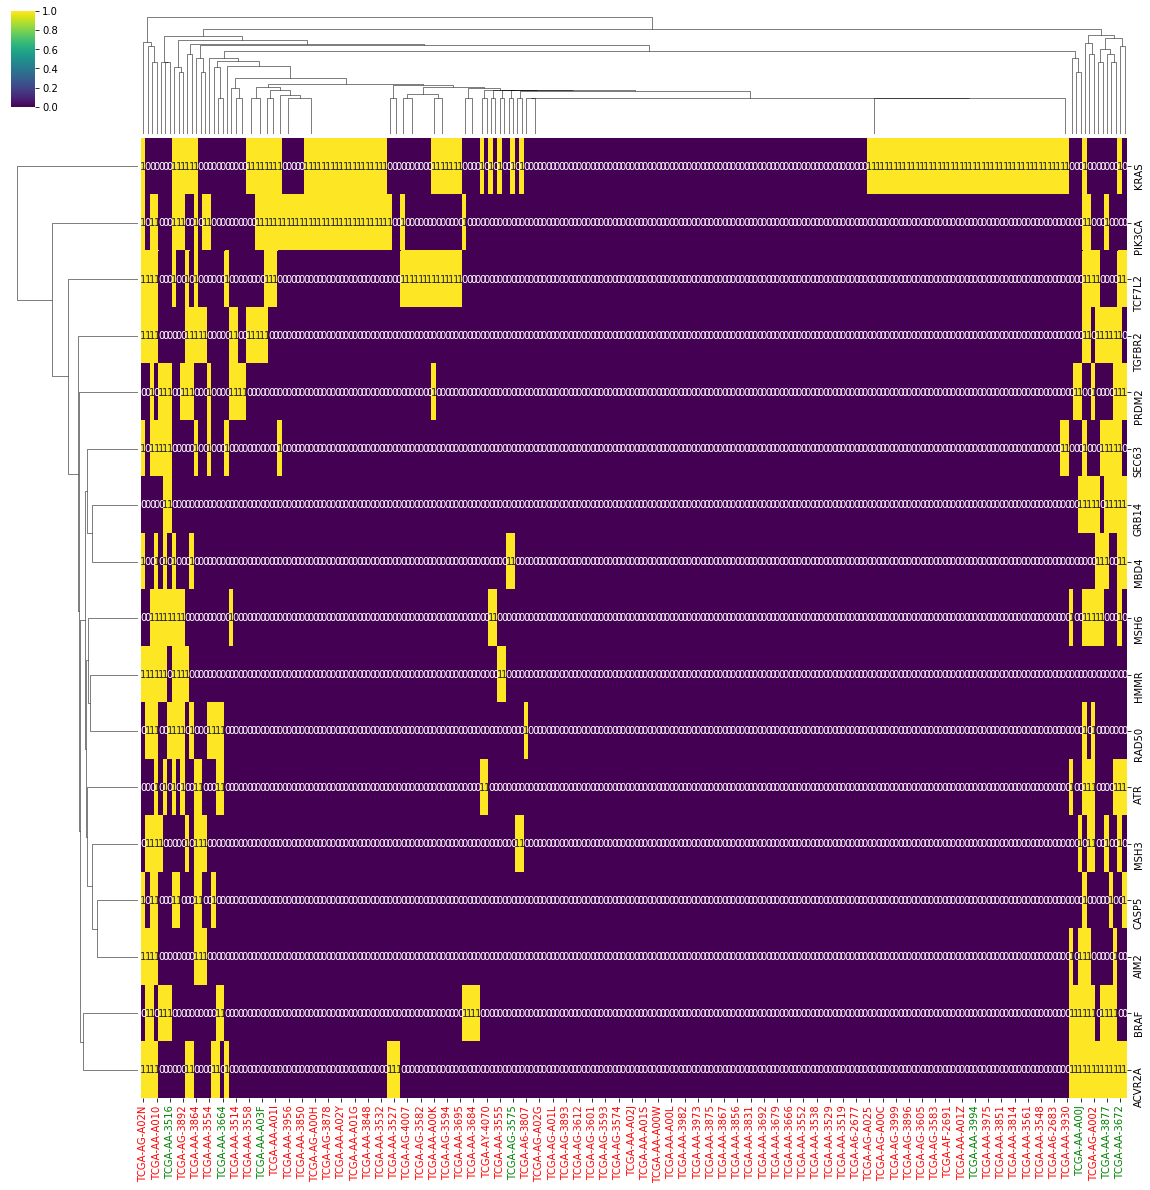

In [5]:
g = sns.clustermap(dataMatrix, figsize=(20,20), yticklabels=True, annot=True, fmt="g", cmap='viridis')
for tick_label in g.ax_heatmap.axes.get_xticklabels():
    ttxt = tick_label.get_text()
    tick_label.set_color(colorstore[ttxt])
plt.show()